In [ ]:
import  numpy  as  np
import  pandas  as  pd
from  tensorflow.keras.models  import  Sequential
from  tensorflow.keras.layers  import  LSTM ,  Dense
from  sklearn.model_selection  import  train_test_split
from  sklearn.preprocessing  import  MinMaxScaler
import  matplotlib.pyplot  as  plt
from  tensorflow.keras.optimizers  import  Adam

In [ ]:
excel_file=pd.read_excel('/content/Data Asli.xlsx')

In [ ]:
#Melakukan interpolasi
df_interpol=excel_file.interpolate()
df_interpol

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
0,2013-01-01 00:00:00,25.000000,31.8,27.40,87.0,0.00,4.1,4.0,2.0
1,2013-01-02 00:00:00,24.000000,28.2,26.60,85.0,6.20,0.0,6.0,0.0
2,2013-01-03 00:00:00,23.666667,32.0,29.70,76.0,0.00,7.8,4.0,2.0
3,2013-01-04 00:00:00,23.333333,30.8,28.00,82.0,11.00,4.1,6.0,2.0
4,2013-01-05 00:00:00,23.000000,30.6,27.00,85.0,0.00,3.7,6.0,2.0
...,...,...,...,...,...,...,...,...,...
3981,2023-11-26 00:00:00,25.533333,29.7,27.35,88.5,33.75,2.8,2.5,0.5
3982,2023-11-27 00:00:00,24.666667,29.0,27.30,88.0,67.50,1.8,2.0,0.0
3983,2023-11-28 00:00:00,23.800000,31.6,28.40,86.0,0.20,0.0,6.0,2.0
3984,2023-11-29 00:00:00,25.700000,31.5,28.40,86.0,0.00,4.7,5.0,1.0


In [ ]:
df = pd.read_excel('/content/Data Interpolasi Linear.xlsx')
df

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
0,2013-01-01 00:00:00,25.000000,31.8,27.40,87.0,0.00,4.1,4.0,2.0
1,2013-01-02 00:00:00,24.000000,28.2,26.60,85.0,6.20,0.0,6.0,0.0
2,2013-01-03 00:00:00,23.666667,32.0,29.70,76.0,0.00,7.8,4.0,2.0
3,2013-01-04 00:00:00,23.333333,30.8,28.00,82.0,11.00,4.1,6.0,2.0
4,2013-01-05 00:00:00,23.000000,30.6,27.00,85.0,0.00,3.7,6.0,2.0
...,...,...,...,...,...,...,...,...,...
3981,2023-11-26 00:00:00,25.533333,29.7,27.35,88.5,33.75,2.8,2.5,0.5
3982,2023-11-27 00:00:00,24.666667,29.0,27.30,88.0,67.50,1.8,2.0,0.0
3983,2023-11-28 00:00:00,23.800000,31.6,28.40,86.0,0.20,0.0,6.0,2.0
3984,2023-11-29 00:00:00,25.700000,31.5,28.40,86.0,0.00,4.7,5.0,1.0


In [ ]:
import numpy as np
import tensorflow as tf
import random as python_random

# Menetapkan seed
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

In [ ]:
values = df['RR'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

In [ ]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1 # Menggunakan data dari 1 hari sebelumnya untuk memprediksi hari berikutnya
X, Y = create_dataset(scaled_values, look_back)

In [ ]:
# Ubah input menjadi [samples, time steps, features]
X = np.reshape(X, (X.shape[0], look_back, 1))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True
    ),
    LSTM(50,return_sequences=True),
    LSTM(50),
       Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Latih model
model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/30
100/100 - 10s - loss: 0.0038 - val_loss: 0.0041 - 10s/epoch - 97ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0036 - val_loss: 0.0041 - 637ms/epoch - 6ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0037 - val_loss: 0.0039 - 662ms/epoch - 7ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0036 - val_loss: 0.0040 - 587ms/epoch - 6ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0037 - val_loss: 0.0041 - 619ms/epoch - 6ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0036 - val_loss: 0.0041 - 700ms/epoch - 7ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0036 - val_loss: 0.0041 - 741ms/epoch - 7ms/step
Epoch 8/30
100/100 - 1s - loss: 0.0036 - val_loss: 0.0039 - 798ms/epoch - 8ms/step
Epoch 9/30
100/100 - 1s - loss: 0.0036 - val_loss: 0.0040 - 989ms/epoch - 10ms/step
Epoch 10/30
100/100 - 1s - loss: 0.0035 - val_loss: 0.0039 - 908ms/epoch - 9ms/step
Epoch 11/30
100/100 - 1s - loss: 0.0035 - val_loss: 0.0040 - 1s/epoch - 11ms/step
Epoch 12/30
100/100 - 1s - loss: 0.0035 - val_loss: 0.0040 - 812ms/epoch - 8ms/step
Ep

In [ ]:
# Mengakses layer LSTM pertama
lstm_layer_1 = model.layers[0]

# Mendapatkan bobot dari layer LSTM pertama
weights, recurrent_weights, bias = lstm_layer_1.get_weights()

# Bobot ini merupakan numpy arrays
# weights: Bobot untuk input
# recurrent_weights: Bobot untuk recurrent connection
# bias: Bias

print("Bobot untuk input:", weights.shape)
print("Bobot untuk recurrent connection:", recurrent_weights.shape)
print("Bias:", bias.shape)

Bobot untuk input: (1, 200)
Bobot untuk recurrent connection: (50, 200)
Bias: (200,)


In [ ]:
weight=model.get_weights()
weight

[array([[ 0.25086793,  0.81404644,  0.7012886 ,  0.10371117, -0.09822229,
          0.38701758,  0.8947412 , -0.09597035,  0.97634184,  0.11645947,
         -0.15984729,  0.05585809,  0.57091945,  1.1445065 ,  0.6431062 ,
          0.10850628, -0.13385306,  0.3824804 , -0.04568155,  0.6490915 ,
          0.39335307,  1.1104983 ,  1.1134367 ,  0.8066739 ,  0.9483049 ,
          0.3324422 ,  0.79886734,  0.8049059 ,  0.04543918,  0.75887996,
         -0.16301717,  1.1288848 , -0.07764465, -0.10028846,  0.85218817,
          0.95779073,  0.5970644 ,  0.6748318 ,  0.99906236,  0.79581827,
          0.7292868 ,  0.9133231 , -0.09604096,  1.0118347 ,  1.0633333 ,
          0.8699425 , -0.06961203,  0.82275873,  0.19193761,  0.06376771,
          0.04022646,  0.00274903, -0.16318062, -0.13141897,  0.10068977,
          0.12653229, -0.02354911, -0.06435506, -0.16135044, -0.15940352,
          0.08951879,  0.11355275, -0.04285432,  0.07586753, -0.06354921,
          0.09637982, -0.06382878, -0.

In [ ]:
# Membuat prediksi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

25/25 [==============================] - 0s 3ms/step


In [ ]:
# Invers transformasi skala
train_predict = scaler.inverse_transform(train_predict)
Y_train_inv = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test_inv = scaler.inverse_transform([Y_test])

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# Menghitung MAE untuk data latih
mae_train = mean_absolute_error(Y_train_inv.flatten(), train_predict.flatten())
print(f"MAE untuk data latih: {mae_train}")

mae_test = mean_absolute_error(Y_test_inv.flatten(), test_predict.flatten())
print(f"MAE untuk data uji: {mae_test}")

MAE untuk data latih: 8.416609859759811
MAE untuk data uji: 9.468342320104364


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Menghitung MSE terlebih dahulu
mse_train = mean_squared_error(Y_train_inv.flatten(), train_predict.flatten())
mse_test = mean_squared_error(Y_test_inv.flatten(), test_predict.flatten())

# Menghitung RMSE dengan mengambil akar kuadrat dari MSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"RMSE untuk data latih: {rmse_train}")
print(f"RMSE untuk data uji: {rmse_test}")

RMSE untuk data latih: 14.211412183502665
RMSE untuk data uji: 15.23187617614838


In [ ]:
# Prediksi untuk hari berikutnya
last_input = scaled_values[-look_back:]
# Reshape last_input sesuai dengan format yang dibutuhkan oleh LSTM: [samples, time steps, features]
next_day_pred_scaled = model.predict(np.reshape(last_input, (1, look_back, 1)))
next_day_pred = scaler.inverse_transform(next_day_pred_scaled)

print(f"Prediksi suhu untuk hari berikutnya: {next_day_pred[0][0]}")

1/1 [==============================] - 0s 23ms/step
Prediksi suhu untuk hari berikutnya: 6.775656223297119


In [ ]:
import matplotlib.pyplot as plt

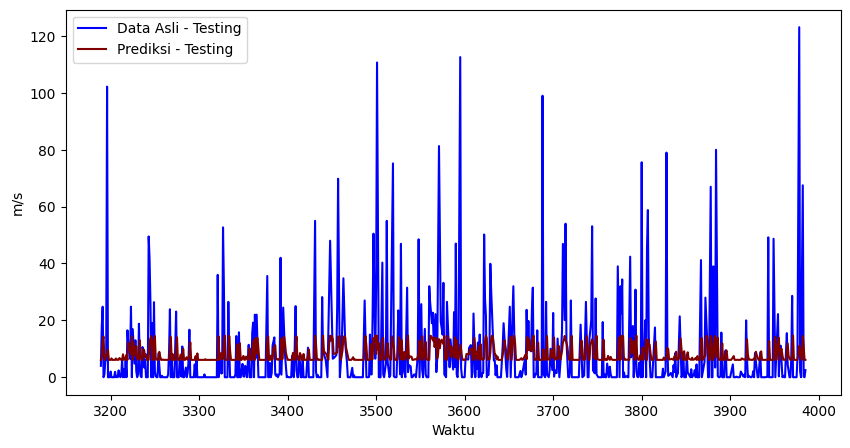

In [ ]:
# Plot data asli dan data prediksi untuk data latih
plt.figure(figsize=(10, 5))

# Index untuk plotting
train_index = range(1, len(Y_train_inv[0]) + 1)
test_index = range(len(Y_train_inv[0]) + 1, len(Y_train_inv[0]) + 1 + len(Y_test_inv[0]))


# Plot data testing
plt.plot(test_index, Y_test_inv.flatten(), label='Data Asli - Testing', color='blue' )
plt.plot(test_index, test_predict.flatten(), label='Prediksi - Testing', color='maroon')

plt.legend()
plt.xlabel('Waktu')
plt.ylabel('m/s')
plt.show()


In [ ]:
# Siapkan DataFrame untuk menyimpan hasil
pred_df = pd.DataFrame({
    'Prediksi_Train': np.squeeze(train_predict),
    'Y_Train': np.squeeze(Y_train_inv),
    'Prediksi_Test': np.pad(np.squeeze(test_predict), (0, len(Y_train) - len(Y_test)), 'constant', constant_values=np.nan),
    'Y_Test': np.pad(np.squeeze(Y_test_inv), (0, len(Y_train) - len(Y_test)), 'constant', constant_values=np.nan)
})

# Simpan ke CSV
pred_df.to_csv('prediksi_suhu ff_x.csv', index=False)